# RNN (by Tensorflow)

In [1]:
VOCAB_SIZE = 300    # 사용할 단어 수
SEQ_LEN = 100       # 시퀀스 하나의 최대 길이

### 데이터 준비

**<IMDB 데이터 설명>**

   - Keras의 **IMDB 데이터셋**은 영화 리뷰 텍스트에 기반한 이진 분류(binary classification) 문제를 해결하기 위한 데이터셋이다. 영화 리뷰가 긍정적(positive)인지 부정적(negative)인지 분류하는 작업에 자주 사용

**주요 특징**

1. **데이터셋 구조**
   - **학습 데이터(train data)**: 25,000개
   - **테스트 데이터(test data)**: 25,000개
   - 각 리뷰는 영화 리뷰 텍스트이며, 숫자로 토큰화되어 있다.
   - 레이블(Label)은 0(부정) 또는 1(긍정)으로 구성되어 있다.

2. **단어 인덱싱**
   - 리뷰는 단어의 빈도 순으로 정수 인덱스로 변환된다.
   - 가장 빈도가 높은 단어는 1, 그다음 단어는 2로 인덱싱되며, 0은 패딩(padding)에 사용된다.

3. **토큰 제한**
   - 기본적으로 상위 `num_words`만 포함한다. (예: `num_words=10000`일 경우 상위 10,000개의 단어만 사용)

In [ ]:
# imdb 데이터 로드
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=VOCAB_SIZE)

In [4]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
train_input, test_input = train_input[:10000], test_input[:5000]
train_target, test_target = train_target[:10000], test_target[:5000]

In [6]:
len(train_input[0]), len(train_input[1])

(218, 189)

In [ ]:
# 패딩 처리
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=SEQ_LEN)
test_seq = pad_sequences(test_input, maxlen=SEQ_LEN)

train_seq.shape, test_seq.shape

((10000, 100), (5000, 100))

In [ ]:
# 원핫인코딩 처리
from tensorflow.keras.utils import to_categorical

train_onehot = to_categorical(train_seq)
test_onehot = to_categorical(test_seq)

train_onehot.shape, test_onehot.shape

((10000, 100, 300), (5000, 100, 300))

### 모델 준비 및 학습

In [9]:
from tensorflow.keras import models, layers, callbacks, optimizers

input = layers.Input(shape=(SEQ_LEN, VOCAB_SIZE))
x = layers.SimpleRNN(units=8)(input)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(input, output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5135 - loss: 0.6985 - val_accuracy: 0.5255 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5720 - loss: 0.6769 - val_accuracy: 0.6280 - val_loss: 0.6573 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6416 - loss: 0.6432 - val_accuracy: 0.6795 - val_loss: 0.6222 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6839 - loss: 0.6116 - val_accuracy: 0.6965 - val_loss: 0.6047 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7030 - loss: 0.5860 - val_accuracy: 0.7020 - val_loss: 0.5961 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7071 - loss: 0.5765 - val_accuracy: 0.7200 - val_loss: 0.5809 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7065 - loss: 

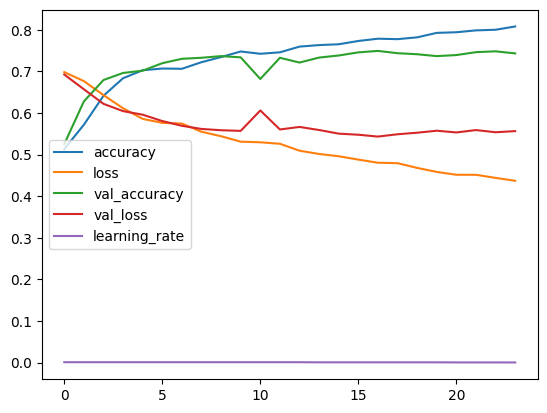

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_cb = callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)
reduce_lr_on_plateau_cb = callbacks.ReduceLROnPlateau(patience=3, factor=0.7, verbose=1)

# 모델 학습
history = model.fit(
    train_onehot,
    train_target,
    epochs=100,
    batch_size=65,
    validation_split=0.2,
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb]
)

# 학습 결과 시각화
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(test_onehot, test_target)
loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7106 - loss: 0.5933


(0.5933265686035156, 0.7106000185012817)